In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import time as tit
names_kk = glob.glob('D:/Vasiliev/PERMAK-A/nv/8dev_9dev/9_kk/*.csv', recursive=False)
names_kq = glob.glob('D:/Vasiliev/PERMAK-A/nv/8dev_9dev/9_kq/*.txt', recursive=False)

In [2]:
kk=[]
kq=[]
state=[]
tvs=[]
tvel=[]
efd=[]
svt=pd.DataFrame(None,None,{'state','time','tvs','tvel','kk','kq'});

tvels=np.arange(277,330,step=10);
for i,f in enumerate(names_kk):
    tit1= tit.time()
    ## TVELS
    k1=pd.read_csv(f, sep=';',names=['tvs', 'tvel', 'time', 'kk']);
    k1.loc[:,'tvel']+=1;
    k2=pd.concat([k1.query('tvel==@i') for i in tvels], ignore_index=True, sort=False)
    
    ## TVS
    q1=pd.read_csv(names_kq[i], sep=';',names=['kq']);
    q1['tvs']=1;
    q1['time']=1;
    tm=0;
    for u in q1.index:
        q1.loc[u,'time']=tm;
        q1.loc[u,'tvs']=(u%163)+1;
        if ((u+1)%163==0):
            tm+=1;
           
    ## ASSIGMENT
    for j in k2.index:
        _kk=k2.loc[j,'kk']
        _tvs=k2.loc[j,'tvs']
        _time=k2.loc[j,'time']
        _tvel=k2.loc[j,'tvel']
        _kq=q1.iloc[(_time*163)+_tvs-1].kq
        le=len(svt)
        kk.append(_kk)
        tvs.append(_tvs)
        tvel.append(_tvel)
        state.append(i)
        kq.append(_kq)
        efd.append(_time)
        
    tit2=tit.time()
    print('cycle ',i, tit2 - tit1)
        
    
            
print('end')

In [6]:
# must be 25 42 800
svt['state']=state
svt['time']=efd
svt['tvs']=tvs
svt['tvel']=tvel
svt['kq']=kq
svt['kk']=kk
print(len(efd))
#svt.to_csv('~D:/Vasiliev/PERMAK-A/nv/max_dev_dev.csv')

2542800


In [2]:
mbk=[]
mbr=[]

mek=[]
mer=[]

nbk=[]
nbr=[]

nek=[]
ner=[]

res_kk=[]
res_kr=[]

tit0=tit.time()
svt=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/max_dev_dev.csv')#, names=['index','kk','tvs','tvel','kq','state','time'])
svt_b=svt.query('time==0')
svt_e=svt.query('time==25')
svt_b.index=np.arange(0,len(svt_b),step=1)
svt_e.index=np.arange(0,len(svt_e),step=1)

In [10]:
for i in range(1,100):
    if (i==50):
        continue
    tit4=tit.time()
    ## TVS LOADING
    q1=pd.read_csv(names_kq[i], sep=';',names=['kq']);
    q1['tvs']=1;
    q1['time']=1;
    tm=0;
    for u in q1.index:
        q1.loc[u,'time']=tm;
        q1.loc[u,'tvs']=(u%163)+1;
        if ((u+1)%163==0):
            tm+=1;
    ### HOTTEST TVS
    tvs_b=q1.query('time==0')
    tvs_e=q1.query('time==25')
    
    sorted_tvs_b=tvs_b.sort_values('kq')
    sorted_tvs_e=tvs_e.sort_values('kq')
    
    hottest_tvs_b=sorted_tvs_b.iloc[143:163]
    hottest_tvs_e=sorted_tvs_e.iloc[143:163]
    
    hottest_tvs_b.index=np.arange(0,len(hottest_tvs_b),step=1)
    hottest_tvs_e.index=np.arange(0,len(hottest_tvs_e),step=1)

    
    ## SELECT THE MOST HOTTEST TVEL
    ## BEGIN         
    kr_max=0
    kk_max=0
    tvs_max=0
    tvel_max=0
    st_max_kr_b=[]
    for j in hottest_tvs_b.tvs:
        sb=svt_b.query('state==@i & tvs==@j')
        sb.index=np.arange(0,len(sb),step=1)
        for element in sb.index:
            kr=sb.loc[element,'kk']*sb.loc[element,'kq']
            if (kr>kr_max):
                tvs_max=sb.loc[element,'tvs']
                tvel_max=sb.loc[element,'tvel']
                kr_max=kr;
            if (sb.loc[element,'kk']>kk_max):
                kk_max=sb.loc[element,'kk'];       
    mbr.append(kr_max)
    mbk.append(kk_max)
    v=svt_b.query('tvs==@tvs_max & tvel==@tvel_max & state==0 & time==0')
    #print(v)
    nbr.append(v.loc[v.index[0],'kk']*v.loc[v.index[0],'kq'])
    nbk.append(v.loc[v.index[0],'kk'])
    
    
    ## END         
    kr_max=0
    kk_max=0
    tvs_max=0
    tvel_max=0
    st_max_kr_e=[]
    for j in hottest_tvs_e.tvs:
        se=svt_e.query('state==@i & tvs==@j')
        se.index=np.arange(0,len(se),step=1)
        for element in se.index:
            kr=se.loc[element,'kk']*se.loc[element,'kq']
            if (kr>kr_max):
                tvs_max=se.loc[element,'tvs']
                tvel_max=se.loc[element,'tvel']
                kr_max=kr;
            if (se.loc[element,'kk']>kk_max):
                kk_max=se.loc[element,'kk'];
    mer.append(kr_max)
    mek.append(kk_max)
    v=svt_e.query('tvs==@tvs_max & tvel==@tvel_max & state==0 & time==25')
    ner.append(v.loc[v.index[0],'kk']*v.loc[v.index[0],'kq'])
    nek.append(v.loc[v.index[0],'kk'])
                
    print(i,tit.time()-tit4)
    

     Unnamed: 0      kk  tvs  tvel     kq  state  time
585       15210  1.1283   97   307  1.225      0     0
1 4.05005145072937
     Unnamed: 0      kk  tvs  tvel     kq  state  time
235        6110  1.0915   73   287  1.251      0     0
2 3.973041296005249
     Unnamed: 0      kk  tvs  tvel     kq  state  time
434       11284  1.1292  109   297  1.225      0     0
3 3.9530248641967773
     Unnamed: 0     kk  tvs  tvel     kq  state  time
516       13416  1.092   28   307  1.251      0     0
4 3.9300339221954346
     Unnamed: 0      kk  tvs  tvel    kq  state  time
262        6812  1.0934  100   287  1.25      0     0
5 3.940033197402954
     Unnamed: 0      kk  tvs  tvel     kq  state  time
944       24544  1.0938  130   327  1.248      0     0
6 3.93003249168396
     Unnamed: 0      kk  tvs  tvel     kq  state  time
715       18590  1.0926   64   317  1.249      0     0
7 3.9240334033966064
     Unnamed: 0      kk  tvs  tvel     kq  state  time
235        6110  1.0915   73   287  1.

     Unnamed: 0      kk  tvs  tvel     kq  state  time
507       13182  1.0938   19   307  1.251      0     0
65 3.85001802444458
     Unnamed: 0      kk  tvs  tvel     kq  state  time
742       19292  1.0909   91   317  1.249      0     0
66 3.8700268268585205
    Unnamed: 0      kk  tvs  tvel     kq  state  time
66        1716  1.1281   67   277  1.225      0     0
67 3.849036455154419
     Unnamed: 0     kk  tvs  tvel     kq  state  time
359        9334  1.094   34   297  1.252      0     0
68 3.9580330848693848
     Unnamed: 0      kk  tvs  tvel     kq  state  time
715       18590  1.0926   64   317  1.249      0     0
69 3.8860156536102295
     Unnamed: 0      kk  tvs  tvel     kq  state  time
742       19292  1.0909   91   317  1.249      0     0
70 3.884026288986206
     Unnamed: 0     kk  tvs  tvel    kq  state  time
135        3510  1.091  136   277  1.25      0     0
71 3.9570322036743164
     Unnamed: 0      kk  tvs  tvel    kq  state  time
262        6812  1.0934  100   287

In [11]:
devrb=[]
devre=[]
devkb=[]
devke=[]
mbr[49]=mbr[1]
mer[49]=mer[1]
for i in range(0,len(nbr)):
    devrb.append(100*(mbr[i]-nbr[i])/nbr[i])
    devre.append(100*(mer[i]-ner[i])/ner[i])
    devkb.append(100*(mbk[i]-nbk[i])/nbk[i])
    devke.append(100*(mek[i]-nek[i])/nek[i])
devrb[49]=devrb[1]
devre[49]=devre[1]
devkb[49]=devkb[1]
devke[49]=devke[1]

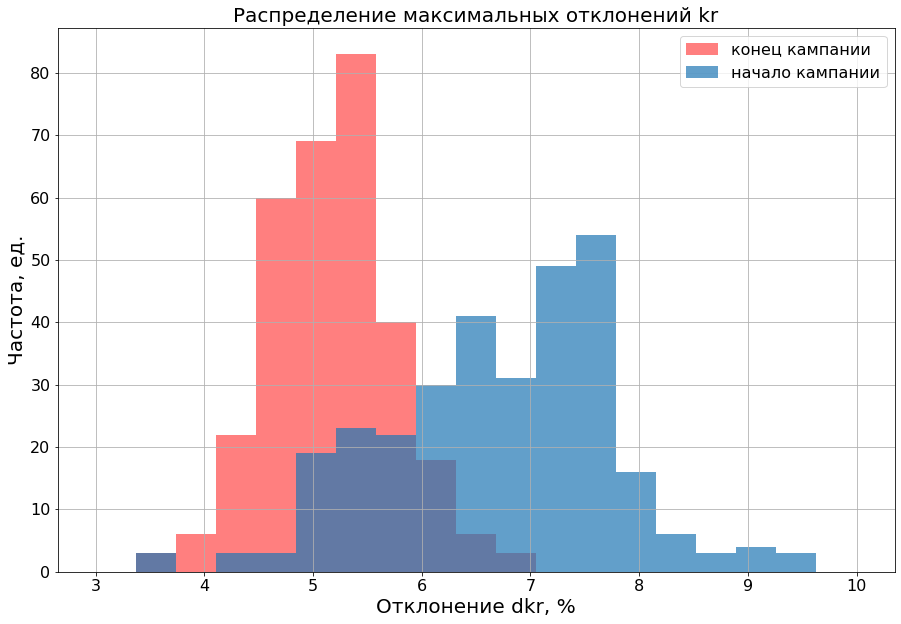

In [37]:
plt.figure(figsize=(15,10))
bind=np.linspace(3,10,20);
plt.grid(True)
plt.hist(devre,bind, alpha=0.5, label='конец кампании', color='red');
plt.hist(devrb,bind, alpha=0.7, label='начало кампании');
plt.title('Распределение максимальных отклонений kr', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Отклонение dkr, %', fontsize=20)
plt.ylabel('Частота, ед.', fontsize=20)
plt.legend(fontsize=16)
plt.show()
#plt.hist(devre)

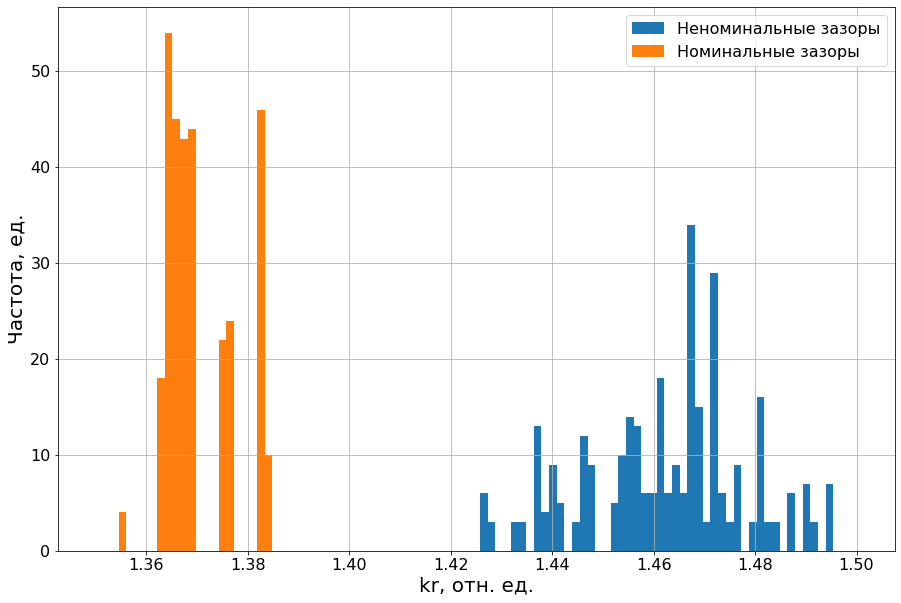

In [36]:
plt.figure(figsize=(15,10))
bins=np.linspace(1.35,1.50,100);
plt.grid(True)
plt.hist(mbr,bins, label='Неноминальные зазоры');
plt.hist(nbr,bins, label='Номинальные зазоры');
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('kr, отн. ед.', fontsize=20)
plt.ylabel('Частота, ед.', fontsize=20)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

[1.3226484,
 1.3226484,
 1.3208485,
 1.3212249999999999,
 1.321605,
 1.3190522999999998,
 1.323804,
 1.322766,
 1.319936,
 1.313478,
 1.323804,
 1.323804,
 1.3202088,
 1.3212249999999999,
 1.3218549,
 1.3212249999999999,
 1.3226484,
 1.3192915,
 1.3212249999999999,
 1.3212249999999999,
 1.321878,
 1.3221348000000002,
 1.3202088,
 1.322766,
 1.3143933,
 1.3202088,
 1.3226484,
 1.3209768,
 1.323804,
 1.3202088,
 1.3208507999999999,
 1.314639,
 1.3190522999999998,
 1.3203372,
 1.3226484,
 1.2967080000000002,
 1.3140486,
 1.323804,
 1.314816,
 1.3145618,
 1.321605,
 1.3221348000000002,
 1.3158,
 1.3139939999999999,
 1.314816,
 1.3192915,
 1.3221348000000002,
 1.321878,
 1.322766,
 1.1053275999999999,
 1.3158,
 1.3226484,
 1.3190522999999998,
 1.3203372,
 1.322766,
 1.3208507999999999,
 1.3226484,
 1.3209768,
 1.3192915,
 1.3137919999999998,
 1.3158,
 1.3212249999999999,
 1.322766,
 1.3226484,
 1.3221348000000002,
 1.3158,
 1.3212249999999999,
 1.321476,
 1.3208485,
 1.3226484,
 1.322134800